In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sympy import *
from tabulate import tabulate
from IPython.display import Markdown as md
from IPython.display import display
import seaborn as sns



init_session()
x,y = symbols('x, y', real=True)

IPython console for SymPy 1.2 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



## Ejercicio 1

Una asociación de consumidores ha realizado una prueba sobre la duración de unas bombillas de una conocida marca. Ha mantenido encendidas ininterrumpidamente 100 bombillas hasta que se han estropeado. Sus resultados han sido:

In [2]:
# límite inferior, superior y frecuencia
#datos = np.array([[36,42,12],[42,48,28],[48,54,44],[54,60,11],[60,66,5]])
datos = np.array([[36,42,12],[42,48,28],[48,54,45],[54,60,15]])
tabla_enunciado = pd.DataFrame(list(zip([r"$"+latex(Interval.Ropen(k[0],k[1]))+"$" for k in datos[:,0:2]],datos[:,2])), columns=['Duración','Cantidad'])
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
md(tabla_enunciado_latex)


\begin{tabular}{rlr}
\hline
    & Duración              &   Cantidad \\
\hline
  0 & $\left[36, 42\right)$ &         12 \\
  1 & $\left[42, 48\right)$ &         28 \\
  2 & $\left[48, 54\right)$ &         45 \\
  3 & $\left[54, 60\right)$ &         15 \\
\hline
\end{tabular}

In [3]:
marca = (datos[:,1]+datos[:,0])/2
marca = marca.reshape(-1,1)
datos = np.concatenate((datos, marca), axis=1)[:,[0,1,3,2]]
datos

array([[36., 42., 39., 12.],
       [42., 48., 45., 28.],
       [48., 54., 51., 45.],
       [54., 60., 57., 15.]])

In [4]:
tabla = pd.DataFrame({r'lim_inf': datos[:,0],'lim_sup': datos[:,1],
                      'x_i': datos[:,2],'f_i':datos[:,3],'F_i':datos[:,3].cumsum(),
                     'h_i': datos[:,3]/datos[:,3].sum(), 'H_i':(datos[:,3]/datos[:,3].sum()).cumsum(),
                     'x_if_i': datos[:,2]*datos[:,3], 'x^2_if_i': datos[:,2]**2*datos[:,3]})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[np.nan,np.nan,np.nan,tabla.f_i.sum(),
                         np.nan, tabla.h_i.sum(), np.nan,
                        tabla.x_if_i.sum(),tabla['x^2_if_i'].sum()]],columns=list(tabla.columns))
totales

tabla.append(totales,ignore_index=True)

,lim_inf,lim_sup,x_i,f_i,F_i,h_i,H_i,x_if_i,x^2_if_i
0,36.0,42.0,39.0,12.0,12.0,0.12,0.12,468.0,18252.0
1,42.0,48.0,45.0,28.0,40.0,0.28,0.40,1260.0,56700.0
2,48.0,54.0,51.0,45.0,85.0,0.45,0.85,2295.0,117045.0
3,54.0,60.0,57.0,15.0,100.0,0.15,1.00,855.0,48735.0
4,NaN,NaN,NaN,100.0,NaN,1.00,NaN,4878.0,240732.0


In [5]:
md(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

\begin{tabular}{rrrrrrrrrr}
\hline
    &   lim\_inf &   lim\_sup &   x\_i &   f\_i &   F\_i &   h\_i &    H\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
  0 &        36 &        42 &    39 &    12 &    12 &  0.12 &   0.12 &      468 &      18252 \\
  1 &        42 &        48 &    45 &    28 &    40 &  0.28 &   0.4  &     1260 &      56700 \\
  2 &        48 &        54 &    51 &    45 &    85 &  0.45 &   0.85 &     2295 &     117045 \\
  3 &        54 &        60 &    57 &    15 &   100 &  0.15 &   1    &      855 &      48735 \\
  4 &       nan &       nan &   nan &   100 &   nan &  1    & nan    &     4878 &     240732 \\
\hline
\end{tabular}

Determina la media, la varianza y la desviación típica:

In [6]:
media = (totales['x_if_i']/totales['f_i'])[0]
media

var = (totales['x^2_if_i']/totales['f_i']-media**2)[0]

desv_tip = sqrt(var)

{'media':media, 'varianza': var, 'desviación típica': desv_tip}

{'media': 48.78,
 'varianza': 27.83159999999998,
 'desviación típica': 5.27556632031102}

Calcula la Mediana

In [7]:
# Índice donde está el percentil

perc = 50

ind = tabla.loc[tabla.H_i<=perc/100].iloc[-1:].index[0] + 1

tabla.iloc[ind]

lim_inf         48.00
lim_sup         54.00
x_i             51.00
f_i             45.00
F_i             85.00
h_i              0.45
H_i              0.85
x_if_i        2295.00
x^2_if_i    117045.00
Name: 2, dtype: float64

In [8]:
k = perc
N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'k':k, 'N': N, 'L_i': L, 'f_i': f, 'F_{i-1}':F, 'C_i':C})

percentil = L + C*(k*(N/100)-F)/f

percentil


{'k': 50, 'N': 100.0, 'L_i': 48.0, 'f_i': 45.0, 'F_{i-1}': 40.0, 'C_i': 6.0}


En el anuncio de televisión el fabricante asegura que sus bombillas duran más de 1000 horas. ¿Qué porcentaje de las bombillas no cumple lo enunciado?

In [9]:
valor = 1200/24
print(valor)
ind = tabla.loc[tabla.lim_inf<=valor].iloc[-1:].index[0]

if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i

N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'valor':valor, 'N': N, 'L_i': L, 'f_i': f, 'F_{i-1}':F, 'C_i':C})

100-solve(Eq(valor,L+C*(x*N/100-F)/f))[0]

50.0
{'valor': 50.0, 'N': 100.0, 'L_i': 48.0, 'f_i': 45.0, 'F_{i-1}': 40.0, 'C_i': 6.0}


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from sympy import *
from tabulate import tabulate
from IPython.display import Markdown as md
from IPython.display import display
import seaborn as sns



init_session()
x,y = symbols('x, y', real=True)

IPython console for SymPy 1.2 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



## Ejercicio 1_b

Un fabricante de neumáticos de F1 ha realizado una prueba sobre la duración de sus juegos de ruedas. Ha mantenido en un circuito a 40 pilotos circulando ininterrumpidamente hasta que los neumáticos se han desgastado. Sus resultados han sido:


In [14]:
# límite inferior, superior y frecuencia
#datos = np.array([[36,42,12],[42,48,28],[48,54,44],[54,60,11],[60,66,5]])
datos = np.array([[120,150,12],[150,180,18],[180,210,8],[210,240,2]])
tabla_enunciado = pd.DataFrame(list(zip([r"$"+latex(Interval.Ropen(k[0],k[1]))+"$" for k in datos[:,0:2]],datos[:,2])), columns=['Duración','Cantidad'])
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
md(tabla_enunciado_latex)


\begin{tabular}{rlr}
\hline
    & Duración                &   Cantidad \\
\hline
  0 & $\left[120, 150\right)$ &         12 \\
  1 & $\left[150, 180\right)$ &         18 \\
  2 & $\left[180, 210\right)$ &          8 \\
  3 & $\left[210, 240\right)$ &          2 \\
\hline
\end{tabular}

In [3]:
marca = (datos[:,1]+datos[:,0])/2
marca = marca.reshape(-1,1)
datos = np.concatenate((datos, marca), axis=1)[:,[0,1,3,2]]
datos

array([[120., 150., 135.,  12.],
       [150., 180., 165.,  18.],
       [180., 210., 195.,   8.],
       [210., 240., 225.,   2.]])

In [4]:
tabla = pd.DataFrame({r'lim_inf': datos[:,0],'lim_sup': datos[:,1],
                      'x_i': datos[:,2],'f_i':datos[:,3],'F_i':datos[:,3].cumsum(),
                     'h_i': datos[:,3]/datos[:,3].sum(), 'H_i':(datos[:,3]/datos[:,3].sum()).cumsum(),
                     'x_if_i': datos[:,2]*datos[:,3], 'x^2_if_i': datos[:,2]**2*datos[:,3]})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[np.nan,np.nan,np.nan,tabla.f_i.sum(),
                         np.nan, tabla.h_i.sum(), np.nan,
                        tabla.x_if_i.sum(),tabla['x^2_if_i'].sum()]],columns=list(tabla.columns))
totales

tabla.append(totales,ignore_index=True)

,lim_inf,lim_sup,x_i,f_i,F_i,h_i,H_i,x_if_i,x^2_if_i
0,120.0,150.0,135.0,12.0,12.0,0.30,0.30,1620.0,218700.0
1,150.0,180.0,165.0,18.0,30.0,0.45,0.75,2970.0,490050.0
2,180.0,210.0,195.0,8.0,38.0,0.20,0.95,1560.0,304200.0
3,210.0,240.0,225.0,2.0,40.0,0.05,1.00,450.0,101250.0
4,NaN,NaN,NaN,40.0,NaN,1.00,NaN,6600.0,1114200.0


In [5]:
md(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

\begin{tabular}{rrrrrrrrrr}
\hline
    &   lim\_inf &   lim\_sup &   x\_i &   f\_i &   F\_i &   h\_i &    H\_i &   x\_if\_i &        x\^{}2\_if\_i \\
\hline
  0 &       120 &       150 &   135 &    12 &    12 &  0.3  &   0.3  &     1620 & 218700          \\
  1 &       150 &       180 &   165 &    18 &    30 &  0.45 &   0.75 &     2970 & 490050          \\
  2 &       180 &       210 &   195 &     8 &    38 &  0.2  &   0.95 &     1560 & 304200          \\
  3 &       210 &       240 &   225 &     2 &    40 &  0.05 &   1    &      450 & 101250          \\
  4 &       nan &       nan &   nan &    40 &   nan &  1    & nan    &     6600 &      1.1142e+06 \\
\hline
\end{tabular}

Determina la media, la varianza y la desviación típica:

In [15]:
media = (totales['x_if_i']/totales['f_i'])[0]
media

var = (totales['x^2_if_i']/totales['f_i']-media**2)[0]

desv_tip = sqrt(var)

{'media':media, 'varianza': var, 'desviación típica': desv_tip}

{'media': 165.0, 'varianza': 630.0, 'desviación típica': 25.0998007960223}

Calcula el percentil 80

In [12]:
# Índice donde está el percentil

perc = 80

ind = tabla.loc[tabla.H_i<=perc/100].iloc[-1:].index[0] + 1

tabla.iloc[ind]

lim_inf        180.00
lim_sup        210.00
x_i            195.00
f_i              8.00
F_i             38.00
h_i              0.20
H_i              0.95
x_if_i        1560.00
x^2_if_i    304200.00
Name: 2, dtype: float64

In [13]:
k = perc
N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'k':k, 'N': N, 'L_i': L, 'f_i': f, 'F_{i-1}':F, 'C_i':C})

percentil = L + C*(k*(N/100)-F)/f

percentil


{'k': 80, 'N': 40.0, 'L_i': 180.0, 'f_i': 8.0, 'F_{i-1}': 30.0, 'C_i': 30.0}


El fabricante asegura que sus juegos de ruedas duran más de 3 horas y cuarto. ¿Qué porcentaje de los juegos no lo cumplen?

In [11]:
valor = 195
print(valor)
ind = tabla.loc[tabla.lim_inf<=valor].iloc[-1:].index[0]

if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i

N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'valor':valor, 'N': N, 'L_i': L, 'f_i': f, 'F_{i-1}':F, 'C_i':C})

100-solve(Eq(valor,L+C*(x*N/100-F)/f))[0]

195
{'valor': 195, 'N': 40.0, 'L_i': 180.0, 'f_i': 8.0, 'F_{i-1}': 30.0, 'C_i': 30.0}


## Ejercicio 1_c

Una oficina bancaría ha tabulado las cantidades de dinero que retiran de sus cuentas 100 clientes jóvenes en
un determinado día:

In [10]:
# límite inferior, superior y frecuencia
#datos = np.array([[36,42,12],[42,48,28],[48,54,44],[54,60,11],[60,66,5]])
datos = np.array([[0,40,40],[40,80,35],[80,120,25]])
tabla_enunciado = pd.DataFrame(list(zip([r"$"+latex(Interval.Ropen(k[0],k[1]))+"$" for k in datos[:,0:2]],datos[:,2])), columns=['Euros','Clientes'])
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
md(tabla_enunciado_latex)


\begin{tabular}{rlr}
\hline
    & Euros                  &   Clientes \\
\hline
  0 & $\left[0, 40\right)$   &         40 \\
  1 & $\left[40, 80\right)$  &         35 \\
  2 & $\left[80, 120\right)$ &         25 \\
\hline
\end{tabular}

In [11]:
marca = (datos[:,1]+datos[:,0])/2
marca = marca.reshape(-1,1)
datos = np.concatenate((datos, marca), axis=1)[:,[0,1,3,2]]
datos

array([[  0.,  40.,  20.,  40.],
       [ 40.,  80.,  60.,  35.],
       [ 80., 120., 100.,  25.]])

In [12]:
tabla = pd.DataFrame({r'lim_inf': datos[:,0],'lim_sup': datos[:,1],
                      'x_i': datos[:,2],'f_i':datos[:,3],'F_i':datos[:,3].cumsum(),
                     'h_i': datos[:,3]/datos[:,3].sum(), 'H_i':(datos[:,3]/datos[:,3].sum()).cumsum(),
                     'x_if_i': datos[:,2]*datos[:,3], 'x^2_if_i': datos[:,2]**2*datos[:,3]})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[np.nan,np.nan,np.nan,tabla.f_i.sum(),
                         np.nan, tabla.h_i.sum(), np.nan,
                        tabla.x_if_i.sum(),tabla['x^2_if_i'].sum()]],columns=list(tabla.columns))
totales

tabla.append(totales,ignore_index=True)

,lim_inf,lim_sup,x_i,f_i,F_i,h_i,H_i,x_if_i,x^2_if_i
0,0.0,40.0,20.0,40.0,40.0,0.40,0.40,800.0,16000.0
1,40.0,80.0,60.0,35.0,75.0,0.35,0.75,2100.0,126000.0
2,80.0,120.0,100.0,25.0,100.0,0.25,1.00,2500.0,250000.0
3,NaN,NaN,NaN,100.0,NaN,1.00,NaN,5400.0,392000.0


In [13]:
md(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

\begin{tabular}{rrrrrrrrrr}
\hline
    &   lim\_inf &   lim\_sup &   x\_i &   f\_i &   F\_i &   h\_i &    H\_i &   x\_if\_i &   x\^{}2\_if\_i \\
\hline
  0 &         0 &        40 &    20 &    40 &    40 &  0.4  &   0.4  &      800 &      16000 \\
  1 &        40 &        80 &    60 &    35 &    75 &  0.35 &   0.75 &     2100 &     126000 \\
  2 &        80 &       120 &   100 &    25 &   100 &  0.25 &   1    &     2500 &     250000 \\
  3 &       nan &       nan &   nan &   100 &   nan &  1    & nan    &     5400 &     392000 \\
\hline
\end{tabular}

Determina la media, la varianza y la desviación típica:

In [14]:
media = (totales['x_if_i']/totales['f_i'])[0]
media

var = (totales['x^2_if_i']/totales['f_i']-media**2)[0]

desv_tip = sqrt(var)

{'media':media, 'varianza': var, 'desviación típica': desv_tip}

{'media': 54.0, 'varianza': 1004.0, 'desviación típica': 31.6859590355097}

Calcula la Mediana

In [15]:
# Índice donde está el percentil

perc = 50

ind = tabla.loc[tabla.H_i<=perc/100].iloc[-1:].index[0] + 1

tabla.iloc[ind]

lim_inf         40.00
lim_sup         80.00
x_i             60.00
f_i             35.00
F_i             75.00
h_i              0.35
H_i              0.75
x_if_i        2100.00
x^2_if_i    126000.00
Name: 1, dtype: float64

In [16]:
k = perc
N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'k':k, 'N': N, 'L_i': L, 'f_i': f, 'F_{i-1}':F, 'C_i':C})

percentil = L + C*(k*(N/100)-F)/f

percentil


{'k': 50, 'N': 100.0, 'L_i': 40.0, 'f_i': 35.0, 'F_{i-1}': 40.0, 'C_i': 40.0}


¿Qué porcentaje de clientes ha retirado menos de 60€?

In [17]:
valor = 60
print(valor)
ind = tabla.loc[tabla.lim_inf<=valor].iloc[-1:].index[0]

if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i

N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'valor':valor, 'N': N, 'L_i': L, 'f_i': f, 'F_{i-1}':F, 'C_i':C})

#100-solve(Eq(valor,L+C*(x*N/100-F)/f))[0]
solve(Eq(valor,L+C*(x*N/100-F)/f))[0]

60
{'valor': 60, 'N': 100.0, 'L_i': 40.0, 'f_i': 35.0, 'F_{i-1}': 40.0, 'C_i': 40.0}


## Ejercicio 2

In [3]:
# límite inferior, superior y frecuencia
#datos = np.array([[36,42,12],[42,48,28],[48,54,44],[54,60,11],[60,66,5]])
datos = np.array([[2.  , 1.8 ],
       [2.4 , 1.68],
       [2.5 , 1.65],
       [3.  , 1.32],
       [2.9 , 1.44]])

### Covarianza

In [4]:
np.cov(datos[:,0],datos[:,1],bias=True)[0][1]


### Desviaciones típicas

In [5]:
np.std(datos[:,0]), np.std(datos[:,1])

### Coeficiente de correlación

In [6]:
pendiente, ordenada, coefcorr = stats.linregress(datos)[:3]

coefcorr

### Recta de regresión de y sobre x

In [7]:
Eq(y,pendiente*x+ordenada)

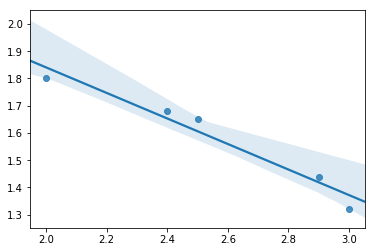

In [14]:
%matplotlib inline

f1 = sns.regplot(datos[:,0],datos[:,1]).figure
f1.savefig('regresion.pgf')


### Valor a estimar

In [24]:
valor_a_estimar = 2.6

(pendiente*x+ordenada).subs(x,valor_a_estimar)

In [25]:
tabla = pd.DataFrame({r'x': datos[:,0],'y': datos[:,1],
                      'xy': datos[:,0]*datos[:,1],'x2':datos[:,0]**2,'y2':datos[:,1]**2})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[tabla.x.sum(),tabla.y.sum(),tabla.xy.sum(),tabla.x2.sum(),
                         tabla.y2.sum()]],columns=list(tabla.columns))
totales

medias = pd.DataFrame([[tabla.x.mean(),tabla.y.mean(),tabla.xy.mean(),tabla.x2.mean(),
                         tabla.y2.mean()]],columns=list(tabla.columns))
medias

tabla.append(totales,ignore_index=True).append(medias,ignore_index=True)

,x,y,xy,x2,y2
0,2.00,1.800,3.6000,4.000,3.24000
1,2.40,1.680,4.0320,5.760,2.82240
2,2.50,1.650,4.1250,6.250,2.72250
3,3.00,1.320,3.9600,9.000,1.74240
4,2.90,1.440,4.1760,8.410,2.07360
5,12.80,7.890,19.8930,33.420,12.60090
6,2.56,1.578,3.9786,6.684,2.52018


In [26]:
md(tabulate(tabla.append(totales,ignore_index=True).append(medias,ignore_index=True), headers="keys", tablefmt="latex"))

\begin{tabular}{rrrrrr}
\hline
    &     x &     y &      xy &     x2 &       y2 \\
\hline
  0 &  2    & 1.8   &  3.6    &  4     &  3.24    \\
  1 &  2.4  & 1.68  &  4.032  &  5.76  &  2.8224  \\
  2 &  2.5  & 1.65  &  4.125  &  6.25  &  2.7225  \\
  3 &  3    & 1.32  &  3.96   &  9     &  1.7424  \\
  4 &  2.9  & 1.44  &  4.176  &  8.41  &  2.0736  \\
  5 & 12.8  & 7.89  & 19.893  & 33.42  & 12.6009  \\
  6 &  2.56 & 1.578 &  3.9786 &  6.684 &  2.52018 \\
\hline
\end{tabular}

## Ejercicio 2_b

In [27]:
# límite inferior, superior y frecuencia
#datos = np.array([[36,42,12],[42,48,28],[48,54,44],[54,60,11],[60,66,5]])
datos = np.array([[10  , 150 ],
       [12 , 120],
       [14 , 102],
       [16  , 90]
       ])

### Covarianza

In [28]:
np.cov(datos[:,0],datos[:,1],bias=True)[0][1]


### Desviaciones típicas

In [29]:
np.std(datos[:,0]), np.std(datos[:,1])

### Coeficiente de correlación

In [30]:
pendiente, ordenada, coefcorr = stats.linregress(datos)[:3]

coefcorr

### Recta de regresión de y sobre x

In [37]:
pprint(Eq(y,pendiente*x+ordenada))

y = -9.9⋅x + 244.2


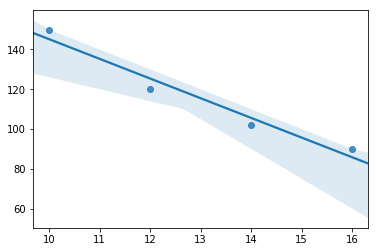

In [38]:
%matplotlib inline

sns.regplot(datos[:,0],datos[:,1])
plt.savefig('regresion1.png')


### Valor a estimar

In [33]:
valor_a_estimar = 11

(pendiente*x+ordenada).subs(x,valor_a_estimar)

In [34]:
tabla = pd.DataFrame({r'x': datos[:,0],'y': datos[:,1],
                      'xy': datos[:,0]*datos[:,1],'x2':datos[:,0]**2,'y2':datos[:,1]**2})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[tabla.x.sum(),tabla.y.sum(),tabla.xy.sum(),tabla.x2.sum(),
                         tabla.y2.sum()]],columns=list(tabla.columns))
totales

medias = pd.DataFrame([[tabla.x.mean(),tabla.y.mean(),tabla.xy.mean(),tabla.x2.mean(),
                         tabla.y2.mean()]],columns=list(tabla.columns))
medias

tabla.append(totales,ignore_index=True).append(medias,ignore_index=True)

,x,y,xy,x2,y2
0,10.0,150.0,1500.0,100.0,22500.0
1,12.0,120.0,1440.0,144.0,14400.0
2,14.0,102.0,1428.0,196.0,10404.0
3,16.0,90.0,1440.0,256.0,8100.0
4,52.0,462.0,5808.0,696.0,55404.0
5,13.0,115.5,1452.0,174.0,13851.0


In [35]:
md(tabulate(tabla.append(totales,ignore_index=True).append(medias,ignore_index=True), headers="keys", tablefmt="latex"))

\begin{tabular}{rrrrrr}
\hline
    &   x &     y &   xy &   x2 &    y2 \\
\hline
  0 &  10 & 150   & 1500 &  100 & 22500 \\
  1 &  12 & 120   & 1440 &  144 & 14400 \\
  2 &  14 & 102   & 1428 &  196 & 10404 \\
  3 &  16 &  90   & 1440 &  256 &  8100 \\
  4 &  52 & 462   & 5808 &  696 & 55404 \\
  5 &  13 & 115.5 & 1452 &  174 & 13851 \\
\hline
\end{tabular}